# Proyek Analisis Data: bike-sharing-dataset

- **Nama:** Rizki Romdhoni
- **Email:** rizkimv27@gmail.com
- **ID Dicoding:** rizki_romdhoni_rvM9


## Menentukan Pertanyaan Bisnis


- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda ?

- Berapa persen peningkatan penyewaan sepeda pada akhir pekan dibandingkan hari kerja ?
- Bisakah kita mengidentifikasi jam-jam puncak penyewaan sepeda setiap hari ?
- Bagaimana tren penyewaan sepeda berubah dari tahun 2011 ke 2012 ?


## Import Semua Packages/Library yang Digunakan


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_theme(style="whitegrid")

## Data Wrangling


### Gathering Data


In [8]:
# Muat data
bike_data_day = pd.read_csv('data/day.csv')
bike_data_hour = pd.read_csv('data/hour.csv')

In [9]:
# load bike data day
bike_data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
# load bike data hour
bike_data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

> ada dua insight yang bisa diambil, diantaranya.

- informasi di data_bike_day berisi data penyewaan sepeda harian, total penyewaan, kondisi cuaca, dan hari libur.
- informasi di data_bike_hour berisi data penyewaan sepeda per jam.


### Assessing Data


### Menilai data bike_data_day


In [11]:
bike_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek missing value


In [12]:
bike_data_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value.


cek duplikasi data


In [13]:
print(f'Jumlah duplikasi data: {bike_data_day.duplicated().sum()}')

Jumlah duplikasi data: 0


Tidak ada duplikasi data


Cek parameter statistik.


In [14]:
bike_data_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
bike_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Menilai data bike_data_hour


In [16]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Cek missing value


In [17]:
bike_data_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ada missing value.


cek duplikasi data


In [18]:
print(f'Jumlah duplikasi data: {bike_data_hour.duplicated().sum()}')

Jumlah duplikasi data: 0


Tidak ada duplikasi data


Cek parameter statistik.


In [19]:
bike_data_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [20]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

- Data harus diubah ke dalam tipe data datetime


### Cleaning Data


Mengubah format tipe data dari bike_data_day & bike_data_hour


In [21]:
datetime_columns = ["dteday"]

for col in datetime_columns:
    bike_data_day[col] = pd.to_datetime(bike_data_day[col])
    bike_data_hour[col] = pd.to_datetime(bike_data_hour[col])


In [22]:
bike_data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

kolom dtday sekarang sudah diganti dengan tipe data datetime


In [23]:
bike_data_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**

- tipe data sudah diubah ke tipe data datetime


## Exploratory Data Analysis (EDA)


### Explore data pengaruh cuaca dalam penyewaan sepeda


Melakukan eksplorasi cuaca dalam penyewaan cuaca.


In [24]:
bike_data_day[["season", "cnt", "temp"]].sample()

,season,cnt,temp
697,4,5260,0.296667


In [25]:
bike_data_day[['season', 'temp']].describe()

,season,temp
count,731.000000,731.000000
mean,2.496580,0.495385
std,1.110807,0.183051
min,1.000000,0.059130
25%,2.000000,0.337083
50%,3.000000,0.498333
75%,3.000000,0.655417
max,4.000000,0.861667


mengubah data dari kolom season menjadi cuaca supaya lebih mudah dibaca.


In [87]:
# Create a dictionary to map numerical weather codes to string descriptions
weather_mapping = {
    1: 'cerah',
    2: 'berawan',
    3: 'hujan',
}

# Create the 'cuaca' column using the mapping
bike_data_day['cuaca'] = bike_data_day['weathersit'].map(weather_mapping)

# Display the updated DataFrame to verify the changes
bike_data_day[['weathersit', 'cuaca']].sample(10)

,weathersit,cuaca
36,1,cerah
627,1,cerah
360,2,berawan
465,1,cerah
161,1,cerah
110,1,cerah
248,3,hujan
420,1,cerah
290,2,berawan
49,1,cerah


buat kolom baru bernama musim


In [88]:
# Create a dictionary to map numerical weather codes to string descriptions
weather_mapping = {
    1: 'musim_dingin',
    2: 'musim_semi',
    3: 'musim_panas',
    4: 'musim_gugur',
}

# Create the 'cuaca' column using the mapping
bike_data_day['musim'] = bike_data_day['season'].map(weather_mapping)

# Display the updated DataFrame to verify the changes
bike_data_day[['season', 'musim']].sample(10)

,season,musim
350,4,musim_gugur
418,1,musim_dingin
516,2,musim_semi
225,3,musim_panas
352,4,musim_gugur
258,3,musim_panas
505,2,musim_semi
625,3,musim_panas
55,1,musim_dingin
614,3,musim_panas


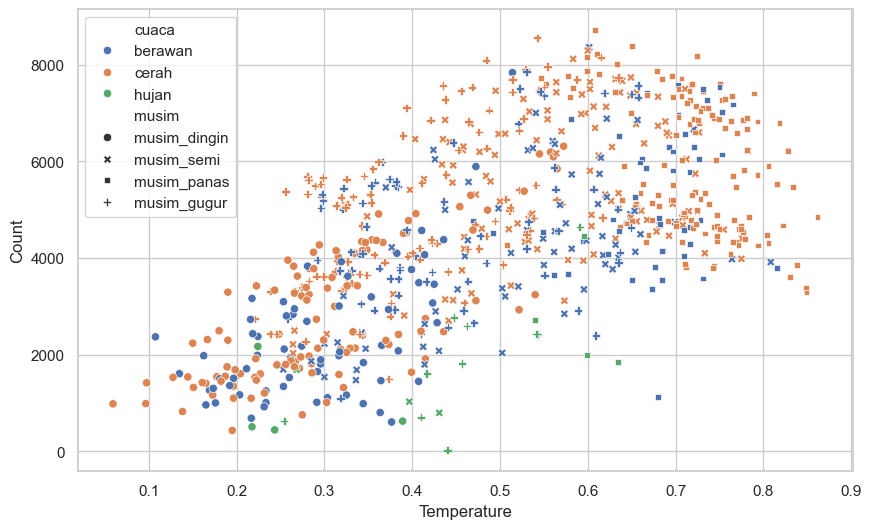

In [89]:
# make a scatterplot
plt.figure(figsize=(10, 6))

sns.scatterplot(x='temp', y='cnt', data=bike_data_day, hue="cuaca", style="musim")
plt.grid(which='minor', linestyle=':', linewidth=0.5)

plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

**insight dari scatterplot :**

- Cuaca cerah adalah kondisi ideal untuk bersepeda. Sebagian besar orang lebih memilih bersepeda ketika cuaca cerah.
- Cuaca hujan menurunkan minat orang untuk menyewa sepeda.


hilangkan outlier


In [91]:
Q1 = bike_data_day['cnt'].quantile(0.25)
Q3 = bike_data_day['cnt'].quantile(0.75)

IQR = Q3 - Q1

# tentukan batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# hapus outlier
bike_data_day[(bike_data_day['cnt'] >= lower_bound) & (bike_data_day['cnt'] <= upper_bound)]

bike_data_day[['cnt']].head(10)

,cnt
0,985
1,801
2,1349
3,1562
4,1600
5,1606
6,1510
7,959
8,822
9,1321


Buat boxplot


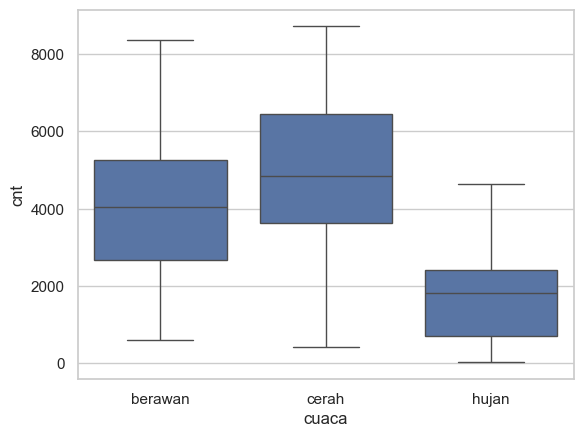

In [93]:
sns.boxplot(x='cuaca', y='cnt', data=bike_data_day)
plt.show()

Dari boxplot ini, kita dapat menyimpulkan bahwa kondisi cuaca, terutama cuaca cerah, memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda.


### Berapa persen peningkatan/penurunan penyewaan sepeda pada akhir pekan dibandingkan hari kerja?


In [31]:
bike_data_day[["holiday", "workingday"]].sum()

holiday        21
workingday    500
dtype: int64

cari berapa persen jumlah peningkatan/penurunan penyewaan pada akhir pekan


In [115]:
def hitung_persentase_penyewaan(data):
    holiday_rentals = bike_data_day[bike_data_day["holiday"] == 1]['cnt'].sum()
    workingday_rentals = bike_data_day[bike_data_day["workingday"] == 0]['cnt'].sum()
    total_rentals = bike_data_day['cnt'].sum()

    # Hitung persentase penyewaan di akhir pekan
    holiday_percentage = (holiday_rentals / total_rentals) * 100

    # Hitung persentase penyewaan di hari kerja
    workingday_percentage = (workingday_rentals / total_rentals) * 100

    print(f"Jumlah persentase penyewaan sepeda pada akhir pekan: {holiday_percentage:.2f}%")
    print(f"Jumlah persentase penyewaan sepeda pada hari kerja: {workingday_percentage:.2f}%")

    # Hitung rata-rata persentase penyewaan (sebagai contoh ambang batas)
    average_percentage = (holiday_percentage + workingday_percentage) / 2

    print(f"Rata-rata persentase penyewaan : {average_percentage:.2f}%")


    # Bandingkan persentase dan tentukan peningkatan/penurunan
    if holiday_percentage > average_percentage:
        print(f"Penyewaan di akhir pekan lebih tinggi sebesar {holiday_percentage - average_percentage:.2f}% dibandingkan rata-rata.")
    else:
        print(f"Penyewaan di akhir pekan lebih rendah sebesar {average_percentage - holiday_percentage:.2f}% dibandingkan rata-rata.")

    if workingday_percentage > average_percentage:
        print(f"Penyewaan di hari kerja lebih tinggi sebesar {workingday_percentage - average_percentage:.2f}% dibandingkan rata-rata.")
    else:
        print(f"Penyewaan di hari kerja lebih rendah sebesar {average_percentage - workingday_percentage:.2f}% dibandingkan rata-rata.")
        
     # Pastikan selalu ada nilai yang dikembalikan
    if total_rentals == 0:
        return None, None  # Jika tidak ada penyewaan, kembalikan None
    else:
        return holiday_percentage, workingday_percentage

Panggil function


In [72]:
hitung_persentase_penyewaan(bike_data_day)

Jumlah persentase penyewaan sepeda pada akhir pekan: 2.38%
Jumlah persentase penyewaan sepeda pada hari kerja: 30.38%
Rata-rata persentase penyewaan : 16.38%
Penyewaan di akhir pekan lebih rendah sebesar 14.00% dibandingkan rata-rata.
Penyewaan di hari kerja lebih tinggi sebesar 14.00% dibandingkan rata-rata.


**Insight**

- Terdapat penurunan penyewaan sepeda di akhir pekan sebanyak 14% dari rata-rata yakni sebesar 16.38%. Karena jumlah persentase penyewaannya hanya sebesar 2.30%.
- Sedangkan di hari kerja persentase penyewaan lebih tinggi dari rata-rata, yakni sebesar 14% dari rata-rata yang sebesar 16.38%. Karena jumlah persentase penyewaannya sebesar 30.38%


### Bisakah kita mengidentifikasi jam-jam puncak penyewaan sepeda setiap hari?


In [34]:
bike_data_hour[["hr", "cnt"]].describe()

,hr,cnt
count,17379.000000,17379.000000
mean,11.546752,189.463088
std,6.914405,181.387599
min,0.000000,1.000000
25%,6.000000,40.000000
50%,12.000000,142.000000
75%,18.000000,281.000000
max,23.000000,977.000000


dari hasil statistik tersebut, ditemukan :

- rata-rata waktu waktu penyewaan terjadi pada pukul 11.54 siang dengan jumlah rata-rata penyewaan sebanyak 189 sepeda.
- Jam tertinggi dalam penyewaan terjadi pada jam 18 (6 sore) dengan rata-rata penyewaan sebanyak 281 sepeda.


urutkan jam penyewaan dari yang sedikit sampai terbanyak


In [35]:
bike_data_hour.groupby(by="hr")["cnt"].sum().sort_values(ascending=True)

hr
4       4428
3       8174
5      14261
2      16352
1      24164
0      39130
6      55132
23     63941
22     95612
21    125445
10    126257
11    151320
7     154171
9     159438
20    164550
14    175652
15    183149
12    184414
13    184919
19    226789
16    227748
8     261001
18    309772
17    336860
Name: cnt, dtype: int64

Jika dilihat, maka jam empat pagi memiliki total penyewaan yang paling sedikit, dan jam lima sore memiliki total penyewaan paling banyak.


### Bagaimana tren penyewaan sepeda berubah dari tahun 2011 ke 2012?


buat kolom baru bernama tahun di data bike_data_day


In [36]:
# Create a dictionary to map numerical weather codes to string descriptions
weather_mapping = {
    0: 2011,
    1: 2012
}

# Create the 'cuaca' column using the mapping
bike_data_day['tahun'] = bike_data_day['yr'].map(weather_mapping)

bike_data_day.sample(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca,tahun
378,379,2012-01-14,1,1,1,0,6,0,1,0.180000,0.183087,0.457500,0.187183,333,2160,2493,cerah,2012
586,587,2012-08-09,3,1,8,0,4,1,1,0.755833,0.699508,0.620417,0.156100,1196,6090,7286,hujan,2012
485,486,2012-04-30,2,1,4,0,1,1,2,0.464167,0.457696,0.570000,0.171638,665,4907,5572,berawan,2012
713,714,2012-12-14,4,1,12,0,5,1,1,0.281667,0.294192,0.642917,0.131229,429,5182,5611,badai,2012
11,12,2011-01-12,1,0,1,0,3,1,1,0.172727,0.160473,0.599545,0.304627,25,1137,1162,cerah,2011
513,514,2012-05-28,2,1,5,1,1,0,1,0.712500,0.679300,0.676250,0.196521,2557,3486,6043,berawan,2012
438,439,2012-03-14,1,1,3,0,3,1,1,0.572500,0.548617,0.507083,0.115062,997,5315,6312,cerah,2012
508,509,2012-05-23,2,1,5,0,3,1,2,0.621667,0.584612,0.774583,0.102000,766,4494,5260,berawan,2012
251,252,2011-09-09,3,0,9,0,5,1,2,0.650000,0.578946,0.897917,0.124379,417,3127,3544,hujan,2011
83,84,2011-03-25,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,300,1910,2210,berawan,2011


#### Melihat tren penyewaan sepeda sepanjang tahun 2011


Melihat tren penyewaan sepeda tiap bulan di tahun 2011 dari yang terkecil sampai yang terbanyak


In [37]:
bike_2011 = bike_data_day[bike_data_day["tahun"] == 2011]

bike_2011.groupby(by="mnth").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
mnth,
6,143512
7,141341
8,136691
5,135821
9,127418
10,123511
11,102167
4,94870
12,87323


Total penyewaan sepeda sepanjang tahun 2011.


In [38]:
bike_2011 = bike_data_day[bike_data_day["tahun"] == 2011]

formated_number = "{:,.0f}".format(bike_2011["cnt"].sum())
print(f"Total penyewaan sepeda sepanjang tahun 2012 adalah {formated_number} sepeda.")

Total penyewaan sepeda sepanjang tahun 2012 adalah 1,243,103 sepeda.


dari tren penyewaan sepeda sepanjang tahun 2011, terlihat memliki jumlah penyewaan sebanyak 1.243.103 sepeda


#### Melihat tren penyewaan sepeda sepanjang tahun 2012


Melihat tren penyewaan sepeda tiap bulan di tahun 2012 dari yang terkecil sampai yang terbanyak


In [39]:
bike_2012 = bike_data_day[bike_data_day["tahun"] == 2012]

bike_2012.groupby(by="mnth").agg({
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,cnt
mnth,
9,218573
8,214503
7,203607
6,202830
10,198841
5,195865
4,174224
3,164875
11,152664


Total penyewaan sepeda sepanjang tahun 2012.


In [40]:
bike_2012 = bike_data_day[bike_data_day["tahun"] == 2012]

formated_number = "{:,.0f}".format(bike_2012["cnt"].sum())
print(f"Total penyewaan sepeda sepanjang tahun 2012 adalah {formated_number} sepeda.")

Total penyewaan sepeda sepanjang tahun 2012 adalah 2,049,576 sepeda.


Mencari apakah ada peninggkatan penyewaan sepeda atau tidak, dan berapa percent peningkatan/penurunan penyewaan sepeda.


In [41]:
bike_rentals_2011 = bike_data_day[bike_data_day['tahun'] == 2011]['cnt'].sum()
bike_rentals_2012 = bike_data_day[bike_data_day['tahun'] == 2012]['cnt'].sum()

percentage = (bike_rentals_2012 - bike_rentals_2011) / bike_rentals_2011 * 100

if percentage > 0:
  print(f"Persentase peningkatan penyewaan dari tahun 2011 ke tahun 2012: {percentage:.2f}%")
else:
  print(f"Persentase penurunan penyewaan dari tahun 2011 ke tahun 2012: {percentage:.2f}%")

Persentase peningkatan penyewaan dari tahun 2011 ke tahun 2012: 64.88%


**Insight**

persentase penyewaan di tahun mengalami peningkatan sebanyak 64.88% persen dari tahun 2011


## Visualization & Explanatory Analysis


### Bagaimana cuaca memengaruhi jumlah penyewaan sepeda ?


In [82]:
bike_data_day.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cuaca,tahun
299,300,2011-10-27,4,0,10,0,4,1,2,0.470000,0.457046,0.812917,0.197763,240,2419,2659,badai,2011
678,679,2012-11-09,4,1,11,0,5,1,1,0.361667,0.355413,0.540833,0.214558,709,5283,5992,badai,2012
662,663,2012-10-24,4,1,10,0,3,1,1,0.587500,0.558721,0.636250,0.072779,795,6898,7693,badai,2012
224,225,2011-08-13,3,0,8,0,6,0,2,0.685833,0.645858,0.729583,0.211454,1504,2646,4150,hujan,2011
696,697,2012-11-27,4,1,11,0,2,1,2,0.291667,0.281558,0.786667,0.237562,123,3836,3959,badai,2012
24,25,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985,cerah,2011
577,578,2012-07-31,3,1,7,0,2,1,1,0.713333,0.662896,0.704167,0.165425,968,6248,7216,hujan,2012
342,343,2011-12-09,4,0,12,0,5,1,1,0.290833,0.317542,0.695833,0.082717,261,3359,3620,badai,2011
648,649,2012-10-10,4,1,10,0,3,1,1,0.514167,0.503142,0.630833,0.187821,780,6911,7691,badai,2012
459,460,2012-04-04,2,1,4,0,3,1,1,0.541667,0.533450,0.469583,0.180975,1058,5378,6436,berawan,2012


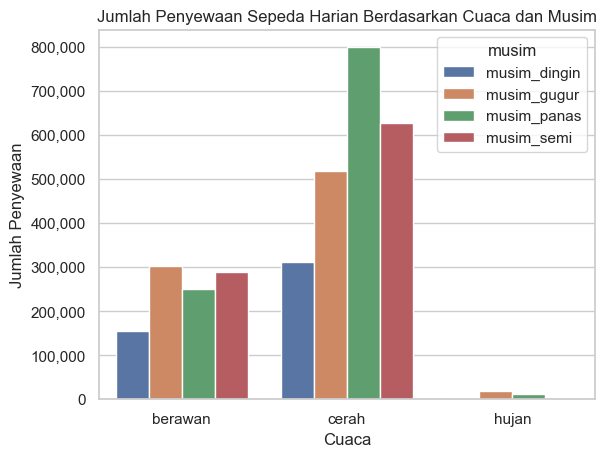

In [110]:
weather_plot = bike_data_day.groupby(by=["cuaca", "musim"])["cnt"].sum().reset_index()
formated_number = "{:,.0f}".format(weather_plot["cnt"].sum())

# rename column 'cnt' to 'jumlah penyewaan'
weather_plot = weather_plot.rename(columns={'cnt': 'Jumlah penyewaan'})

sns.barplot(
    x="cuaca", 
    y="Jumlah penyewaan", 
    hue="musim",
    data=weather_plot
)
plt.title("Jumlah Penyewaan Sepeda Harian Berdasarkan Cuaca dan Musim")
plt.xlabel("Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

**Insight:**

- Cuaca Cerah: Merupakan kondisi cuaca yang paling disukai untuk bersepeda, menghasilkan jumlah penyewaan tertinggi.
- Musim Panas: Merupakan musim dengan jumlah penyewaan sepeda tertinggi secara keseluruhan.
  Cuaca Hujan: Mempengaruhi penurunan jumlah penyewaan sepeda secara signifikan.
- Fluktuasi Musiman: Jumlah penyewaan sepeda bervariasi antar musim, dengan musim panas sebagai puncaknya dan musim dingin sebagai titik terendahnya.
- Kondisi Berawan: Memberikan jumlah penyewaan yang moderat, tidak terlalu tinggi atau rendah.


### Berapa persen peningkatan/penurunan penyewaan sepeda pada akhir pekan dibandingkan hari kerja?


In [116]:
holiday_percentage, workingday_percentage = hitung_persentase_penyewaan(bike_data_day)

Jumlah persentase penyewaan sepeda pada akhir pekan: 2.38%
Jumlah persentase penyewaan sepeda pada hari kerja: 30.38%
Rata-rata persentase penyewaan : 16.38%
Penyewaan di akhir pekan lebih rendah sebesar 14.00% dibandingkan rata-rata.
Penyewaan di hari kerja lebih tinggi sebesar 14.00% dibandingkan rata-rata.


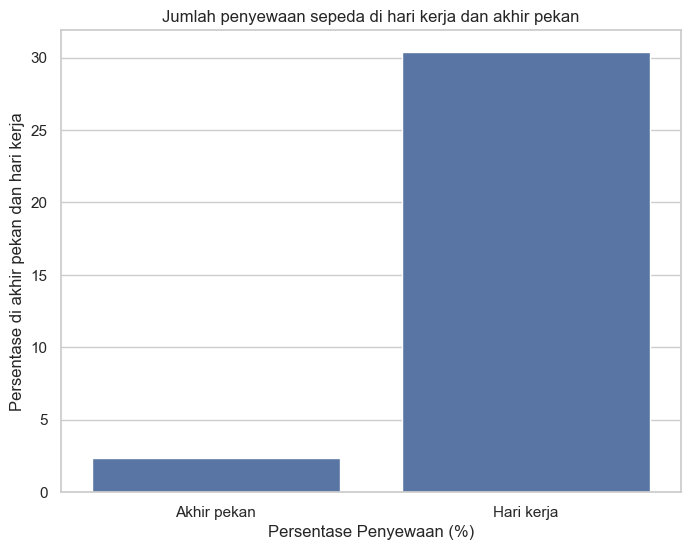

In [117]:
percentages = [holiday_percentage, workingday_percentage]
labels = ["Akhir pekan", "Hari kerja"]

# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.barplot(x=labels, y=percentages)
plt.title('Jumlah penyewaan sepeda di hari kerja dan akhir pekan')
plt.xlabel('Persentase Penyewaan (%)')
plt.ylabel('Persentase di akhir pekan dan hari kerja')
plt.show()

visualisasi dalam bentuk pie chart


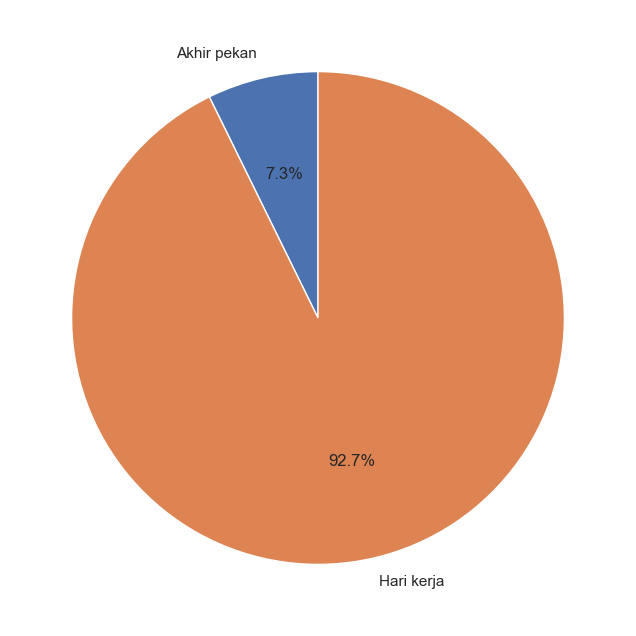

In [118]:
# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.show()

Insight

- Jumlah penyewaan sepeda didominasi pada hari kerja dibandingkan akhir pekan.


### mengidentifikasi jam-jam puncak penyewaan sepeda setiap hari?


In [49]:
# @title buat kolom baru bernama "tahun" di data bike_data_hour

weather_mapping = {
    0: 2011,
    1: 2012
}
bike_data_hour['tahun'] = bike_data_hour['yr'].map(weather_mapping)

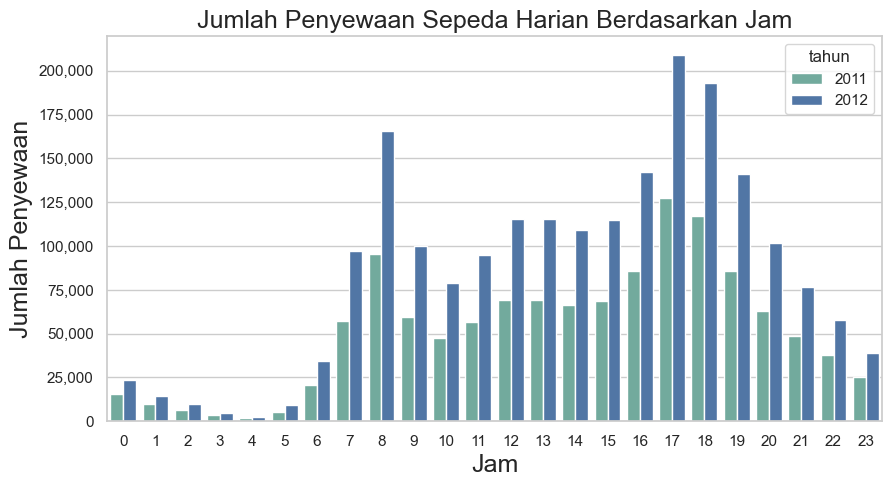

In [50]:
# @title Membuat sebuah barplot
colors = ["#69b3a2", "#4374B3"]

bike_hour = bike_data_hour.groupby(by=["hr", "tahun"])["cnt"].sum().reset_index()


# barplot
plt.figure(figsize=(10, 5))

sns.barplot(
    x="hr",
    y="cnt",
    hue="tahun",
    data=bike_hour,
    palette=colors
)

plt.title("Jumlah Penyewaan Sepeda Harian Berdasarkan Jam", fontsize=18)
plt.xlabel("Jam", fontsize=18)
plt.ylabel("Jumlah Penyewaan", fontsize=18)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

Insight

- Dari plot tersebut bisa disimpulkan jika jumlah terbanyak orang dalam menyewa sepeda ada di jam delapan sampai ke jam lima sore.
- Baik di tahun 2011 dan tahun 2012, jam lima sore memiliki jumlah penyewaan terbesar.


### Bagaimana tren penyewaan sepeda berubah dari tahun 2011 ke 2012?


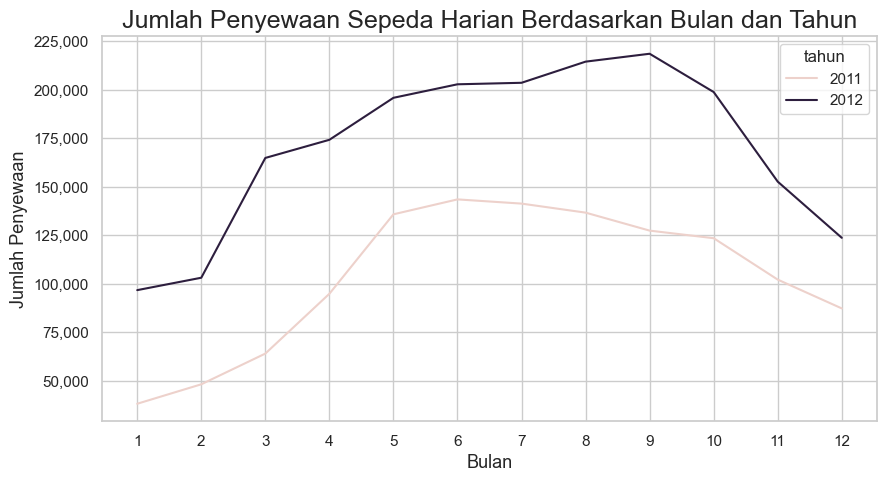

In [51]:
# @title Membuat line plot untuk mengidentifikasi tren

yearly_rentals = bike_data_day.groupby(by=["mnth", "tahun"]).agg({
    "cnt": "sum"
}).reset_index()

# lineplot
plt.figure(figsize=(10, 5))

sns.lineplot(
    x="mnth",
    y="cnt",
    hue="tahun",
    data=yearly_rentals
)

plt.title("Jumlah Penyewaan Sepeda Harian Berdasarkan Bulan dan Tahun", fontsize=18)
plt.xlabel("Bulan", fontsize=13)
plt.ylabel("Jumlah Penyewaan", fontsize=13)
plt.xticks(range(1, 13))

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

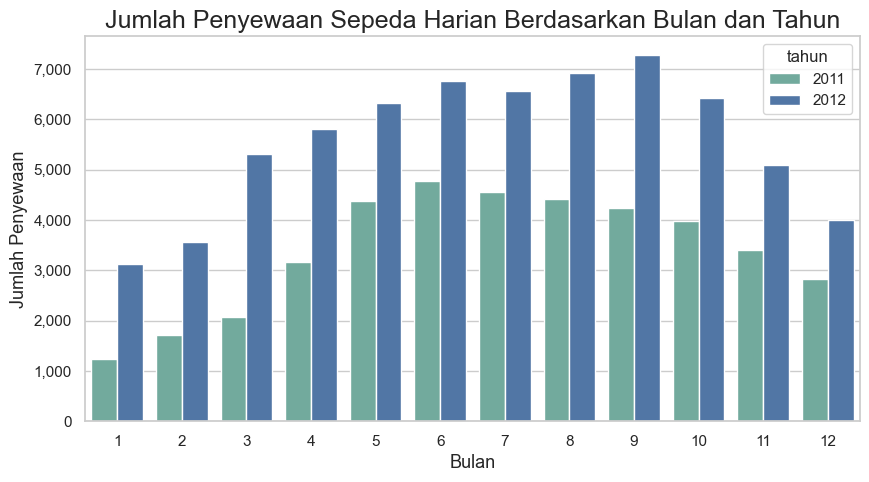

In [52]:
# @title Membuat sebuah barplot
colors = ["#69b3a2", "#4374B3"]


yearly_rentals = bike_data_day.groupby(by=["mnth", "tahun"]).agg({
    "cnt": "mean"
}).reset_index()

# barplot
plt.figure(figsize=(10, 5))

sns.barplot(
    x="mnth",
    y="cnt",
    hue="tahun",
    data=yearly_rentals,
    palette=colors
)

plt.title("Jumlah Penyewaan Sepeda Harian Berdasarkan Bulan dan Tahun", fontsize=18)
plt.xlabel("Bulan", fontsize=13)
plt.ylabel("Jumlah Penyewaan", fontsize=13)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

Insight

- Jumlah penyewaan sepeda dari tahun 2011 sampai tahun 2012 mengalami peningkatan yang cukup besar.

- Rata-rata jumlah penyewaan sepeda di tahun 2012 ada di angka 3.000 sampai diatas 7.000 sepeda dan terbanyak ada di bulan september (9) di tahun 2012.

- Terdapat pola musiman yang jelas pada jumlah penyewaan sepeda. Jumlah penyewaan cenderung meningkat pada bulan-bulan tertentu seperti dari bulan maret (3) sampai bulan september (9) dan menurun pada bulan-bulan seperti bulan oktober (10) sampai bulan februari (2). Ini menunjukkan bahwa faktor cuaca, musim, atau event tertentu dapat mempengaruhi minat masyarakat untuk menyewa sepeda.


## Conclusion


- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda ?

  cuaca sangat berpengaruh pada penyewaan sepeda, sebab ketika cuaca sedang cerah, orang cenderung sering melakukan aktivitas, sedangkan, di cuaca selain cerah, orang cenderung sedikit melakukan aktivitas.

- Berapa persen peningkatan/penurunan penyewaan sepeda pada akhir pekan dibandingkan hari kerja ?

  Jumlah peningkatan penyewaan terjadi pada hari kerja dibandingkan pada hari libur, yakni sebesar 14% dari rata-rata persentase penyewaan sepeda sebesar 16.38%. Dengan total persentase sebesar 30.38%. Sedangkan pada akhir pekan, penyewaan sepeda terjadi penurunan sebesar 14% dari rata-rata, dengan total persentase penyewaan hanya 2.38%.

- Mengidentifikasi jam-jam puncak sepeda setiap hari ?

  jam-jam puncak penyewaan sepeda lebih banyak pada pagi hari dimulai dari jam delapan pagi, sampai jam lima sore. Hal ini juga ada kaitannya dengan kecenderungan orang-orang, karena di jam-jam tersebut orang banyak yang berangkat kerja sampai berpegian ke segala tempat, dan jam puncak seperti jam lima sore menandakan orang menyewa sepeda untuk dipakai pulang dari tempat kerja.

- Bagaimana tren penyewaan sepeda berubah dari tahun 2011 ke tahun 2012 ?

  Tren penyewaan sepeda berubah sangat drastis, dimana orang-orang mulai banyak yang menyewa sepeda, bisa dikarenakan menyewa sepeda lebih murah dibandingkan membeli sepeda, bisa juga dikarenakan karena mereka yang menyewa sepeda hanya menggunakannya sesekali, jadi, daripada mereka membeli lebih baik menyewa sepeda.


In [122]:
# export all data
all_df = pd.merge(
    left=bike_data_day,
    right=bike_data_hour,
    how="inner",
    left_on="dteday",
    right_on="dteday"
)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

In [123]:
all_df.to_csv("bike_data.csv", index=False)